<a href="https://colab.research.google.com/github/smrutipunto/DNN/blob/main/DNN_Practical_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Practical 1- Classification using a NN
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.losses import BinaryCrossentropy
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.losses import BinaryCrossentropy
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, \
classification_report
!pip install scikit-learn

df=pd.read_csv("breast_cancer.csv")
df.head()

df["diagnosis"].value_counts()
#dropping the id as its unique
df=df.drop("id", axis=1)
df.head()
#converting diagnosis to integers
df["diagnosis"]=df["diagnosis"].map({"M": 1, "B":0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x=df.drop("diagnosis", axis=1)
y=df["diagnosis"]
x.shape
(569, 30)
input_layer=keras. Input (shape=[x.shape[1]])
input_layer
hidden_layer=keras.layers.Dense (20, activation="relu")
hidden_layer=hidden_layer(input_layer)
output_layer=keras.layers.Dense(1, activation="sigmoid")
output_layer= output_layer(hidden_layer)
keras_model=keras.Model (inputs=input_layer, outputs=output_layer)
keras_model.summary()
keras_model.compile(optimizer="adam", loss='binary_crossentropy')
In [72]: keras_model.fit(x,y, epochs=3)
#prediction
p=keras_model.predict(x)
p[0:11]
p[:,0][0:11]

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 184.8387
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 128.0331
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 74.6443
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
li_pred=[]
for i in p[:,0]:
    if i>0.7:
        li_pred.append(1)
    else:
        li_pred.append(8)

li_pred[0:11]
#creating a dataframe with actual and predicted value
actual_pred=pd.DataFrame({"actual":y, "predicted":li_pred})
actual_pred.head()
confusion_matrix(actual_pred["actual"], actual_pred["predicted"])
print(classification_report(actual_pred["actual"],
actual_pred["predicted"]))
#divide the data into train and validation set
from sklearn.model_selection import train_test_split
x_tr, x_test,y_tr, y_test=train_test_split(x,y,test_size=0.2,
random_state=100)
keras_model.fit(x_tr,y_tr, epochs=3)
y_train_pred=keras_model.predict(x_tr)
y_train_pred[0:11]
li_pred_train=[1 if x>0.7 else 0 for x in y_train_pred[:,]]
li_pred_train [0:11]
y_tr[0:11]
confusion_matrix(y_tr.values, li_pred_train)
#print classification report for training data
print(classification_report(y_tr.values, li_pred_train))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.37      1.00      0.54       212

    accuracy                           0.37       569
   macro avg       0.19      0.50      0.27       569
weighted avg       0.14      0.37      0.20       569

Epoch 1/3
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 31.7133

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.4053 
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8738 
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6085 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       292
           1       0.92      0.64      0.76       163

    accuracy                           0.85       455
   macro avg       0.88      0.81      0.83       455
weighted avg       0.86      0.85      0.85       455



In [ ]:
y_test_pred=keras_model.predict(x_test)
li_pred_test=[1 if x>0.7 else 0 for x in y_test_pred[:,]]
li_pred_test[0:11]
print(classification_report (y_test.values, li_pred_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        65
           1       0.89      0.67      0.77        49

    accuracy                           0.82       114
   macro avg       0.84      0.81      0.81       114
weighted avg       0.84      0.82      0.82       114



In [ ]:
#Practical 2- Perform Card classification using CNN
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):

   for filename in filenames:

    pass
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Flatten,GaussianNoise
from keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-imagedatasetclassification")
print("Path to dataset files:", path)

KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/gpiosenka/cards-imagedatasetclassification. The server reported the following issues: Permission 'datasets.get' was denied
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [ ]:
data_dir="/kaggle/input/cards-image-datasetclassification/train"
import os
class_list=os.listdir(data_dir)
filestr=data_dir+"/ace of clubs/001.jpg"
print(filestr)
#reading one image
image1=cv.imread(filestr)
print(image1)

plt.imshow(image1)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cards-image-datasetclassification/train'

In [ ]:
#Practical 3- Perform Classification of pet images with residual network
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):

  for filename in filenames:
    print(os.path.join(dirname, filename))
!pip install git+https://github.com/fastai/fastai.git
from fastai.vision.all import *
from fastai import *
import fastai

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-a4aw23dt
  Running command git clone --filter=blob:none --quiet https://github.com/fastai/fastai.git /tmp/pip-req-build-a4aw23dt
  Resolved https://github.com/fastai/fastai.git to commit 1ac4ee147baf86d2f66f13da9d755a4970f1160b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 813.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
from fastai.vision.all import *
from fastai import *
import fastai
fastai.__version__

'2.8.3'

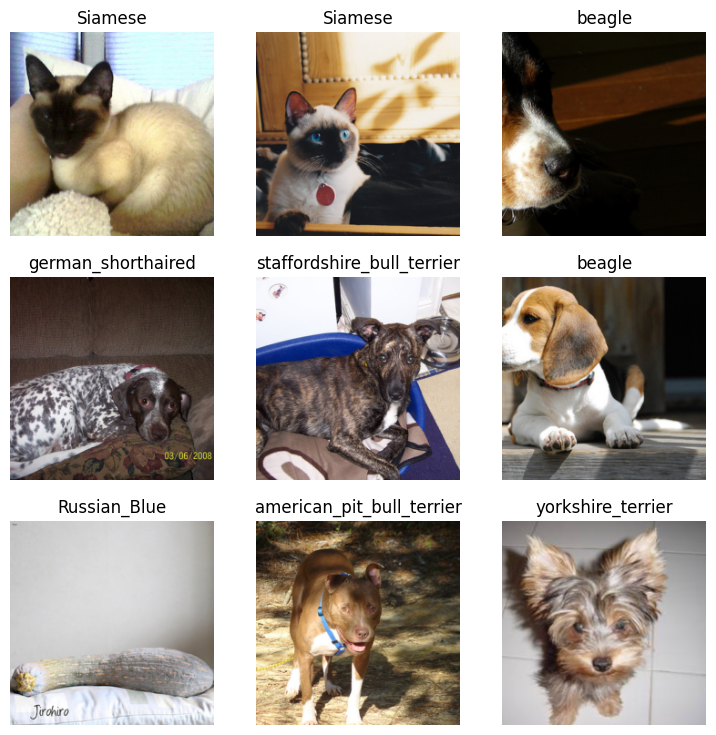

In [ ]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/"images")
pat = r'^(.*)_\d+.jpg$'
dls = ImageDataLoaders.from_name_re(path, fnames, pat,
item_tfms=Resize(224))
dls.show_batch()

In [ ]:
learn = vision_learner(dls, models.resnet18, metrics=[error_rate],
model_dir="/kaggle/working/model")
learn.fit(3)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.935597,0.318123,0.099459,23:01


KeyboardInterrupt: 

In [ ]:
#Practical 4- Predict the character sequence of a custom textual paragraph using RNN
#import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
text = "Elizabeth is, you might say, a lifelong student of human behavior. Instead of being frustrated by the limitations and obligations of her position, the Queen has found freedom in it, channeling that energy to productive ends. Aides will find some event excruciatingly boring. The Queen, on the other hand, will have found something interesting. “Didn’t you realize that chap’s father was the son of my father’s valet?” she’ll be found saying with enthusiasm after a long dinner. “Did you see the man’s red socks?” she’ll ask after a public event. “Why was there an extra director of music in the gallery?” she’ll say after a concert, noticing something that even her security team missed. “What happened to the soldier?” she’ll ask of a young man who cut his hand on a bayonet, and his commanding officer, who thought himself too important to be concerned with such things, will have no answer."
len(text)

893

In [ ]:
#import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


text = "Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers, where's the peck of pickled peppers Peter Piper picked?"


#creating a list of unique characters
chars = sorted(list(set(text)))
vocab_size = len(chars)


#creating a dictionary for encoding character to number
char_to_int = {ch: i for i, ch in enumerate(chars)}


#creating a dictionary for decoding number to character
int_to_char = {i: ch for i, ch in enumerate(chars)}


#create a function to create the sequence code
def create_seq(text, seq_len):
  x_data=[]
  y_data=[]
  for i in range(0, len(text) - seq_len):
    seq_in = text[i:i + seq_len]
    seq_out = text[i + seq_len]
    x_data.append([char_to_int[char] for char in seq_in])
    y_data.append(char_to_int[seq_out])
  return x_data, y_data


seq_length = 5
X, y = create_seq(text, seq_length)


X_np = np.array(X)
y_np = np.array(y)


# One-hot encode the input and output
X_one_hot = tf.one_hot(X_np, vocab_size)
y_one_hot = tf.one_hot(y_np, vocab_size)


model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, vocab_size), activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=500, verbose=0)


start_seq = "Peter picked"
generated_text = start_seq


# Generate characters
for i in range(50):
  x_pred = np.array([char_to_int[c] for c in generated_text[-seq_length:]])
  x_pred_one_hot = tf.one_hot(x_pred, vocab_size)
  x_pred_one_hot = tf.expand_dims(x_pred_one_hot, 0)

  prediction = model.predict(x_pred_one_hot, verbose=0)

  next_index = np.argmax(prediction)
  next_char = int_to_char[next_index]

  generated_text += next_char
  print(generated_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Peter picked 
Peter picked a
Peter picked a 
Peter picked a p
Peter picked a pe
Peter picked a pec
Peter picked a peck
Peter picked a peck 
Peter picked a peck o
Peter picked a peck of
Peter picked a peck of 
Peter picked a peck of p
Peter picked a peck of pi
Peter picked a peck of pic
Peter picked a peck of pick
Peter picked a peck of picke
Peter picked a peck of picked
Peter picked a peck of picked 
Peter picked a peck of picked a
Peter picked a peck of picked a 
Peter picked a peck of picked a p
Peter picked a peck of picked a pe
Peter picked a peck of picked a pec
Peter picked a peck of picked a peck
Peter picked a peck of picked a peck 
Peter picked a peck of picked a peck o
Peter picked a peck of picked a peck of
Peter picked a peck of picked a peck of 
Peter picked a peck of picked a peck of p
Peter picked a peck of picked a peck of pi
Peter picked a peck of picked a peck of pic
Peter picked a peck of picked a peck of pick
Peter picked a peck of picked a peck of picke
Peter pick

In [ ]:
list_index[i]=idx
list_index
#creating a dictionery for decoding number to character
index_char={}
for i in sorted_text:
idx=sorted_text.index(i)
index_char [idx] =i
index_char

NameError: name 'idx' is not defined